# EDA of the datasets

## Importing the datasets

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer # scikit-learn
import matplotlib.pyplot as plt

In [3]:
movie_path=r'data\movies.csv'
rating_path=r'data\ratings.csv'
movie_df=pd.read_csv(movie_path)
rating_df=pd.read_csv(rating_path)

In [4]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
print(f"Movie Dataframe Shape {movie_df.shape}")
print(f"Movie Ratings Shape {rating_df.shape}")

Movie Dataframe Shape (9742, 3)
Movie Ratings Shape (100836, 4)


## Checking Null Values

In [7]:
movie_null_sum = movie_df.isnull().sum()
print(movie_null_sum)

movieId    0
title      0
genres     0
dtype: int64


In [8]:
rating_null_sum=rating_df.isnull().sum()
print(rating_null_sum)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


There aren't any null values in both datasets

## Checking the duplicates

In [9]:
duplicates_movie_title = movie_df['title'].duplicated(keep=False)  # keep=False marks all duplicates as True
movie_df[duplicates_movie_title]

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [10]:
#Checking Duplicates for UserId, MovieID, therefore the user can only review once the movie
duplicates_userId_movieid = rating_df[['movieId', 'userId']].duplicated(keep=False)  # keep=False marks all duplicates as True
rating_df[duplicates_userId_movieid]

,userId,movieId,rating,timestamp


### Removing duplicates

In [11]:
movie_df=movie_df.drop_duplicates(subset='title', keep='first')
rating_df=rating_df.drop_duplicates(subset=['movieId','userId'], keep='first')

## Describing the dataframes & Distribution

In [12]:
movie_df.describe()

,movieId
count,9737.000000
mean,42165.340865
std,52136.321521
min,1.000000
25%,3247.000000
50%,7294.000000
75%,76173.000000
max,193609.000000


In [13]:
rating_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### Movies Distributions

#### Distribution for Genres

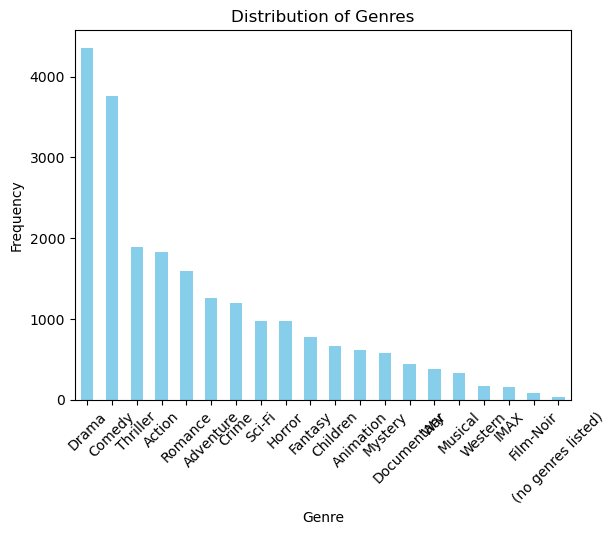

In [14]:
movie_df['genres'] = movie_df['genres'].str.split('|')
movie_df_exploded = movie_df.explode('genres')

genre_counts = movie_df_exploded['genres'].value_counts()

# Plotting the genre distribution
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


#### Distribution for Year 

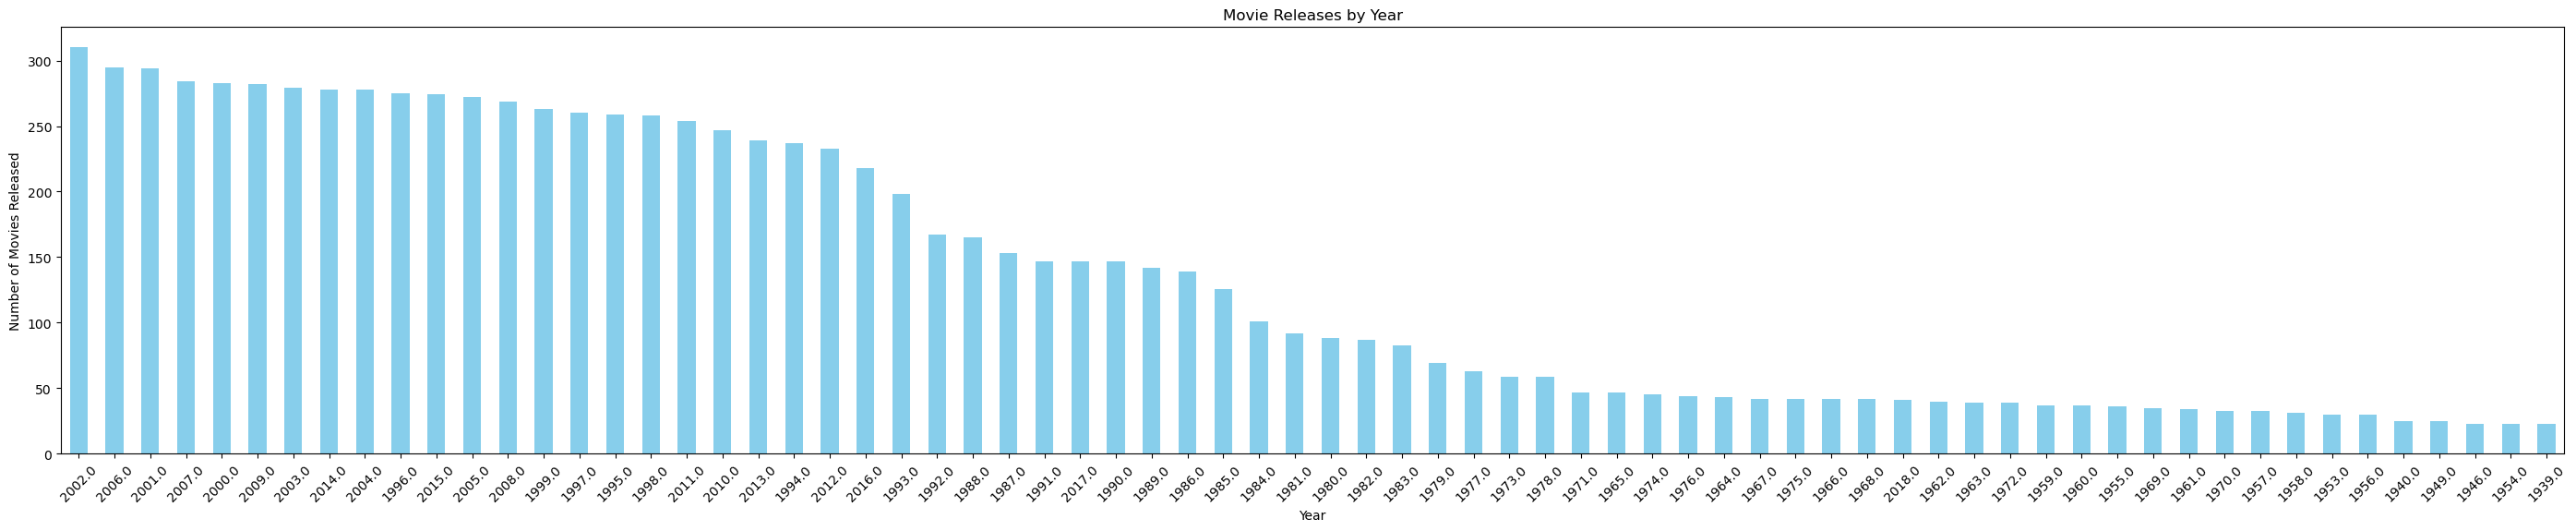

In [15]:
movie_df['year'] = movie_df['title'].str.extract(r'\((\d{4})\)')
movie_df['title'] = movie_df['title'].str.replace(r' \(\d{4}\)', '', regex=True)
movie_df['year'] = pd.to_numeric(movie_df['year'], errors='coerce')
year_counts = movie_df['year'].value_counts().sort_values(ascending=False)
top_70_years = year_counts.head(70)
plt.figure(figsize=(35, 6))
top_70_years.plot(kind='bar', color='skyblue')
plt.title('Movie Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.show()

### Rating Distribution

#### Rating Distrubition by User Id 

The point is figuring which user done the most ratings

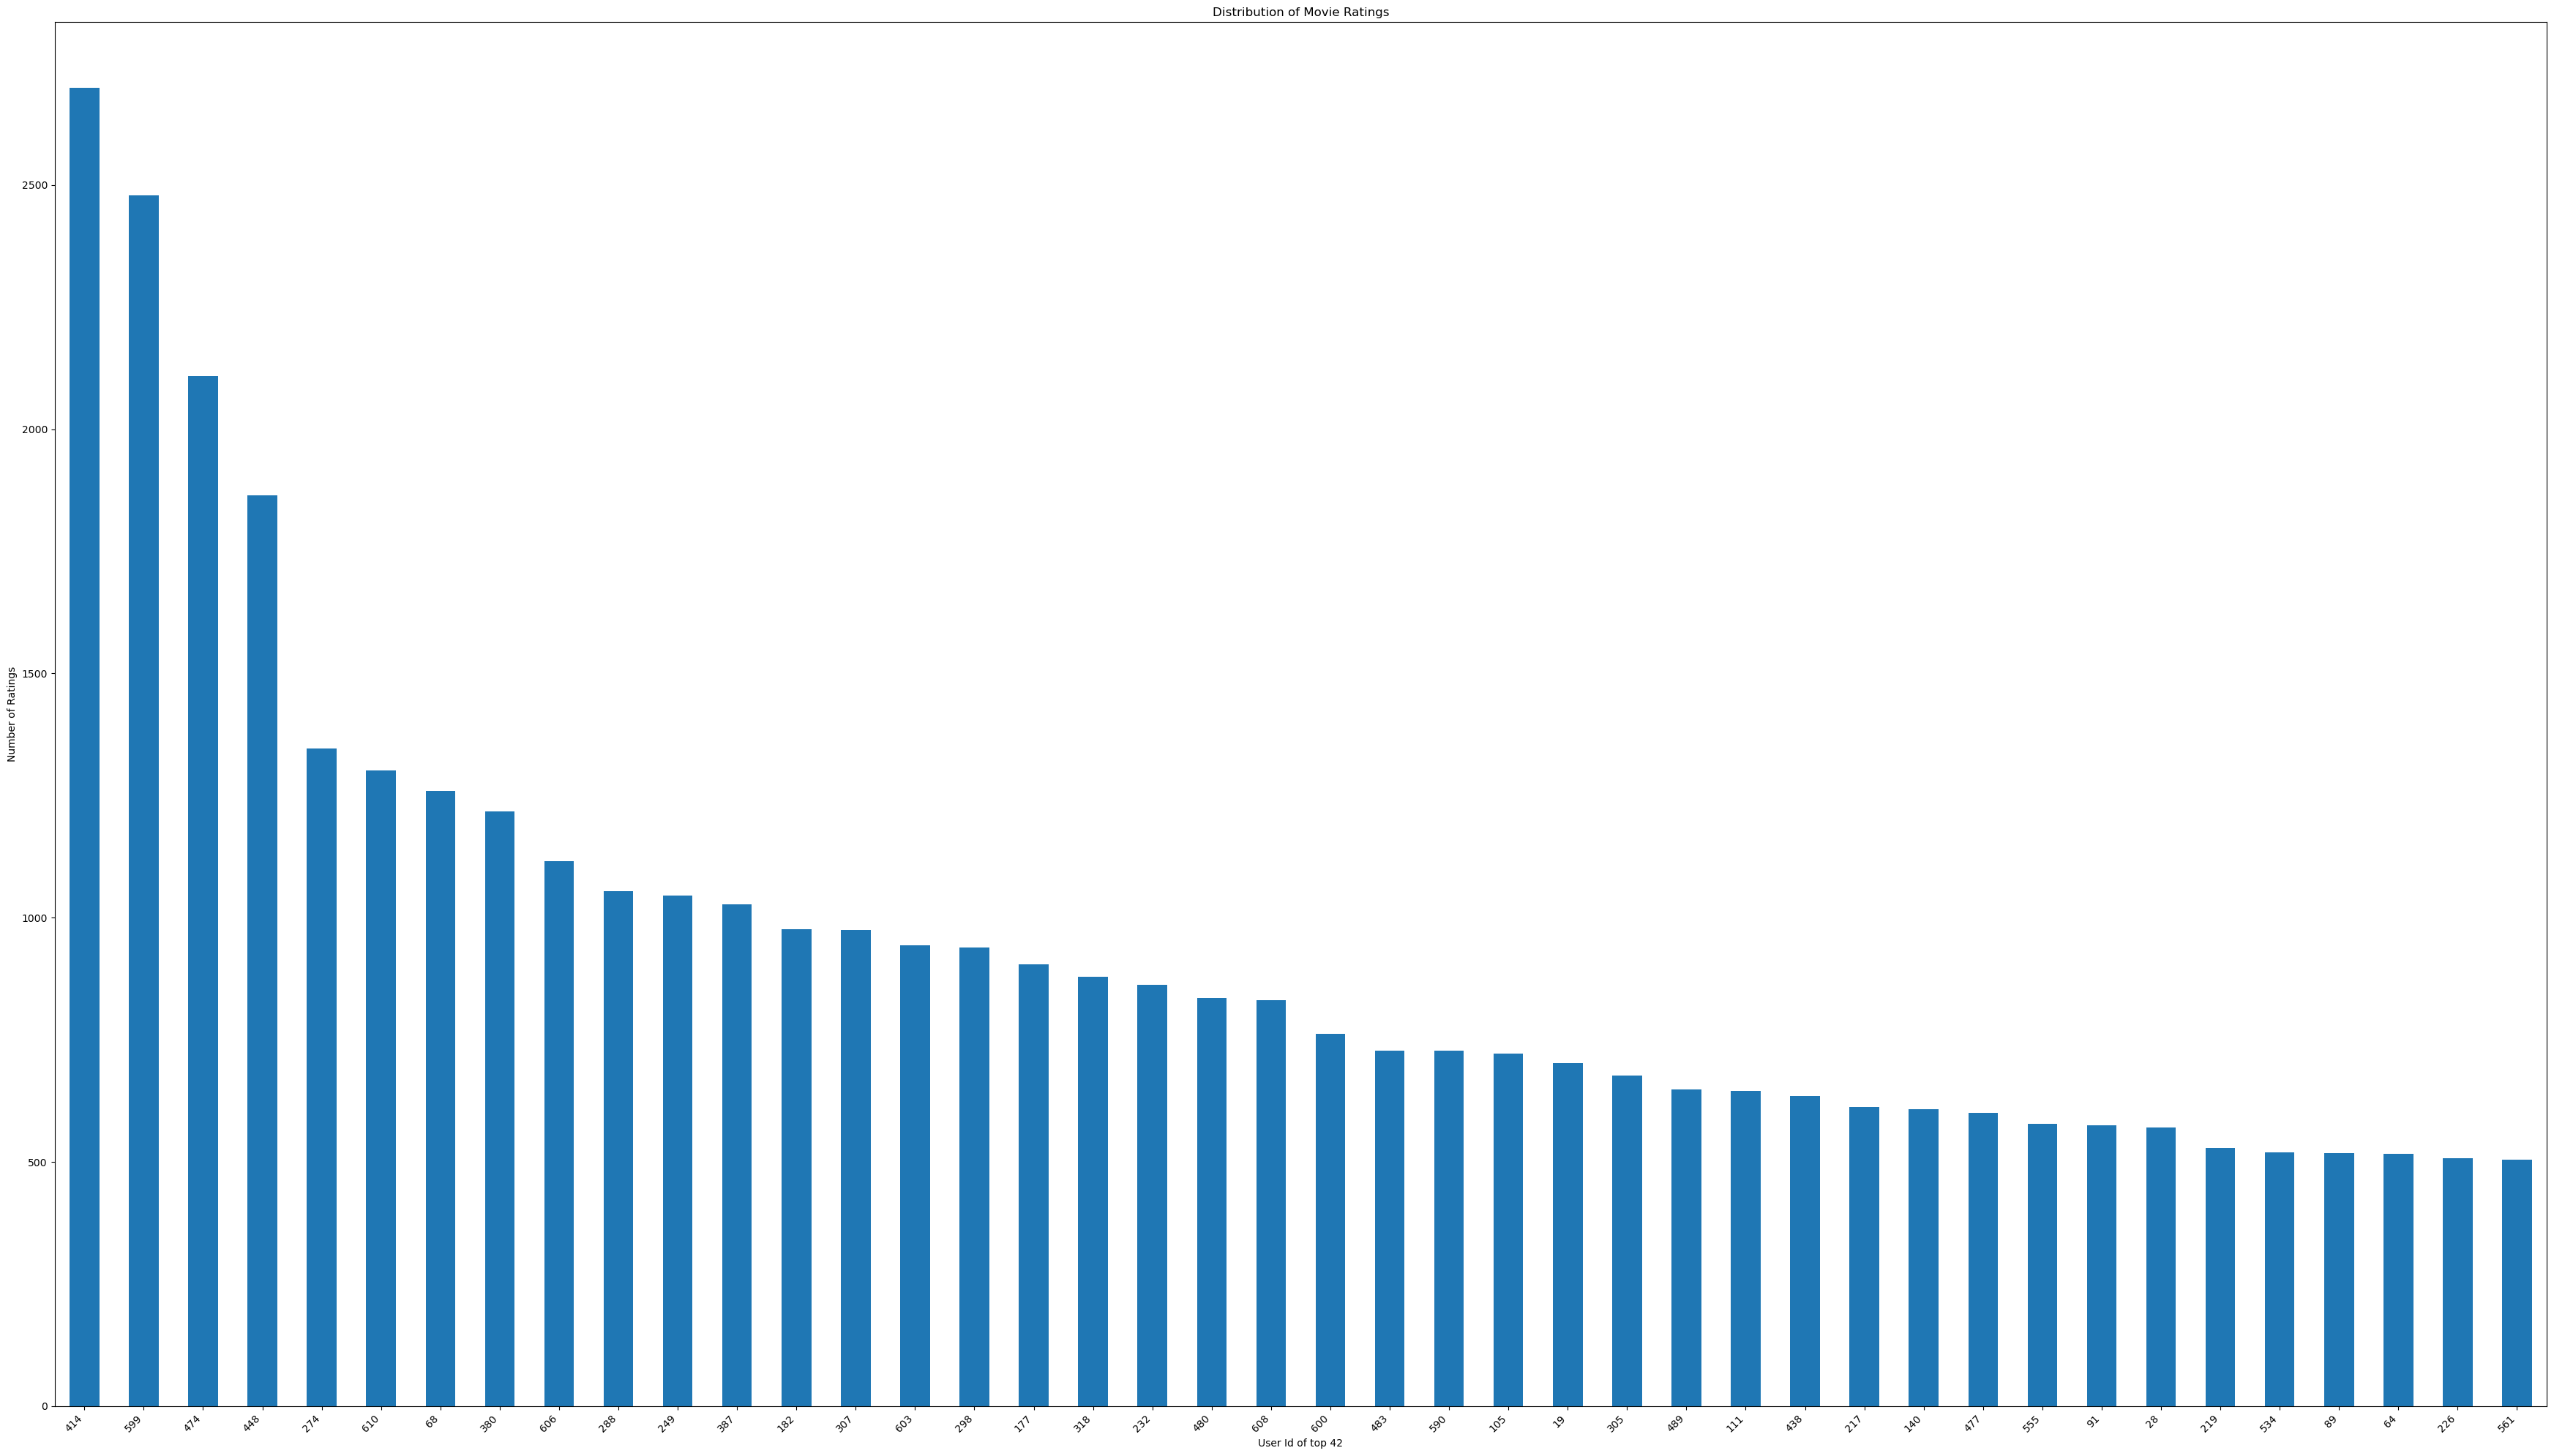

In [16]:
plt.figure(figsize=(35,20))
rating_by_userid=rating_df.groupby('userId')['rating'].count().sort_values(ascending=False)#.plot(kind='bar')
N_userid=42
top_N_users=rating_by_userid.head(N_userid)
top_N_users.plot(kind='bar')
plt.xlabel(f'User Id of top {N_userid}')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Movie Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [17]:
top_N_users

userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
249    1046
387    1027
182     977
307     975
603     943
298     939
177     904
318     879
232     862
480     836
608     831
600     763
483     728
590     728
105     722
19      703
305     677
489     648
111     646
438     635
217     613
140     608
477     600
555     578
91      575
28      570
219     528
534     520
89      518
64      517
226     507
561     505
Name: rating, dtype: int64

#### Rating Distribution by Movie

Figuring out which movie was rated most

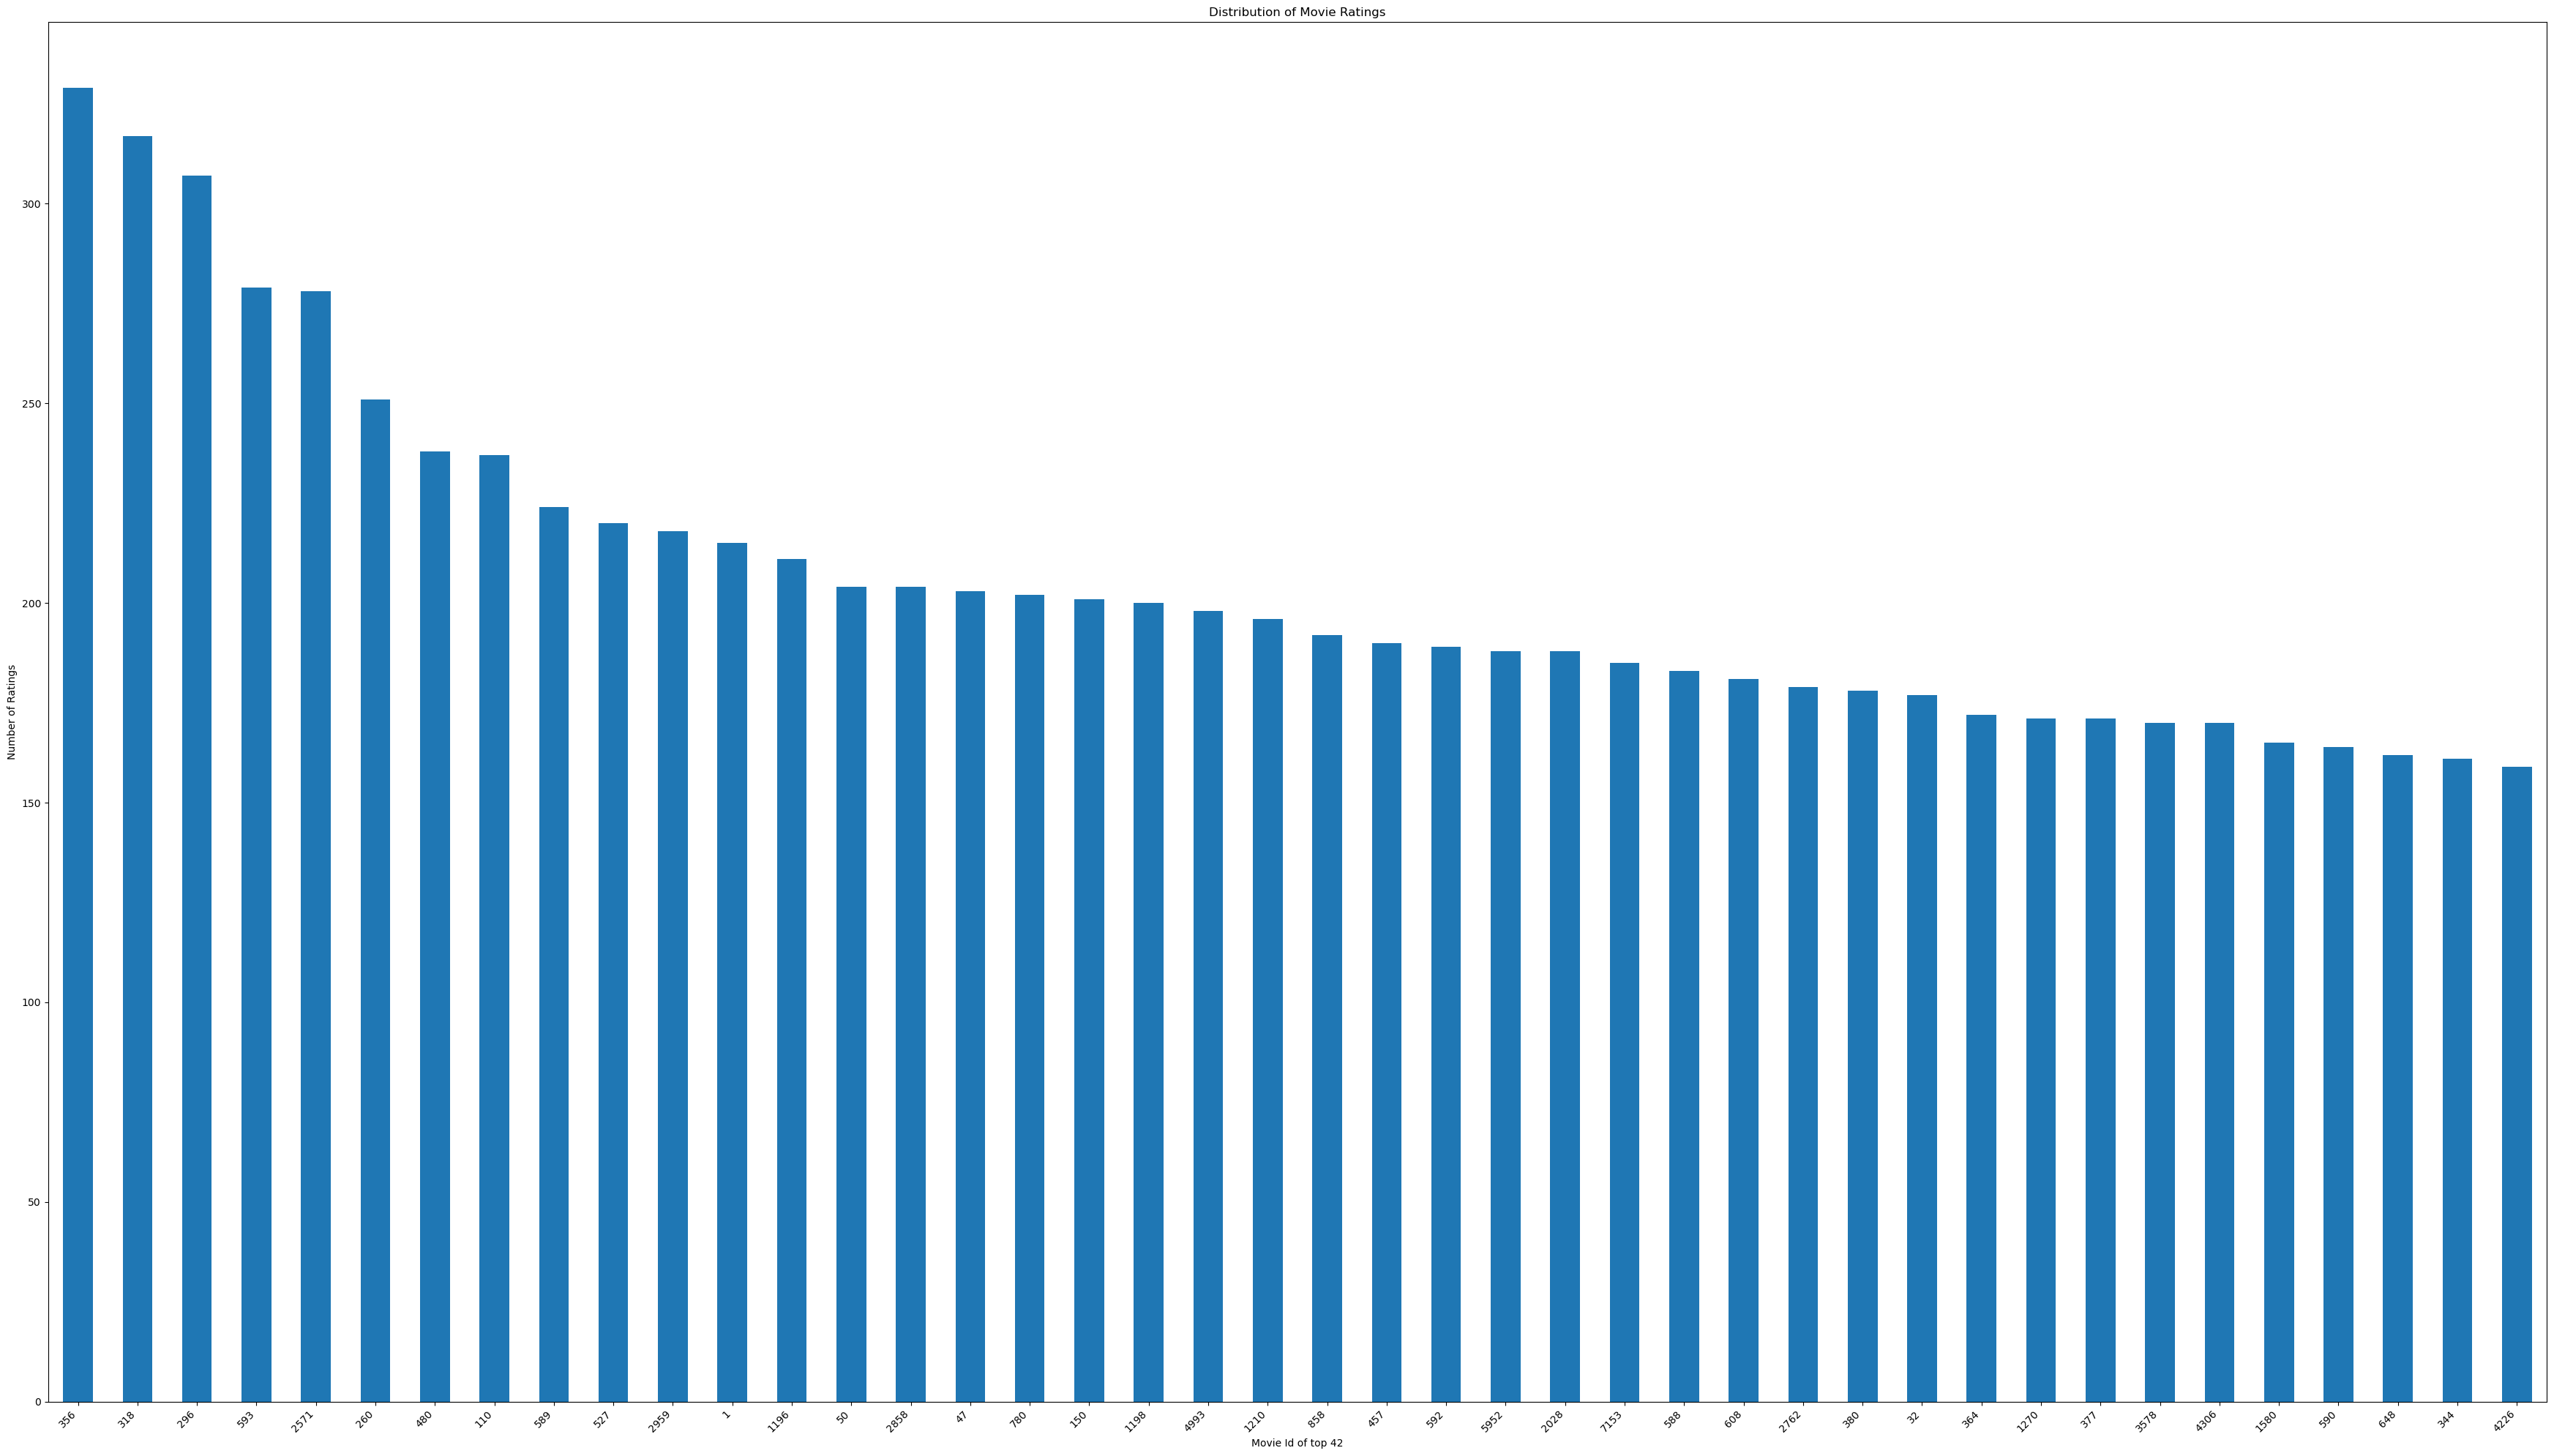

In [18]:
plt.figure(figsize=(35,20))
rating_by_movie_id=rating_df.groupby('movieId')['rating'].count().sort_values(ascending=False)
N_movieid=42
top_N_movies=rating_by_movie_id.head(N_movieid)
top_N_movies.plot(kind='bar')
plt.xlabel(f'Movie Id of top {N_movieid}')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Movie Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
top_N_movies

movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
2959    218
1       215
1196    211
50      204
2858    204
47      203
780     202
150     201
1198    200
4993    198
1210    196
858     192
457     190
592     189
5952    188
2028    188
7153    185
588     183
608     181
2762    179
380     178
32      177
364     172
1270    171
377     171
3578    170
4306    170
1580    165
590     164
648     162
344     161
4226    159
Name: rating, dtype: int64

## Splitting by Genres (Binarize)

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df_genres = pd.DataFrame(mlb.fit_transform(movie_df['genres']), columns=mlb.classes_, index=movie_df.index)
new_df = pd.concat([movie_df[['movieId', 'title', 'year']], df_genres], axis=1)

new_df.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
new_df.loc[new_df['(no genres listed)']>0]

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8517,114335,La cravate,1957.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8684,122888,Ben-hur,2016.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8782,129250,Superfast!,2015.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8836,132084,Let It Be Me,1995.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8902,134861,Trevor Noah: African American,2013.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9033,141131,Guardians,2016.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9053,141866,Green Room,2015.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9070,142456,The Brand New Testament,2015.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9091,143410,Hyena Road,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
new_df.loc[new_df['title']=='Black Mirror']

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9611,176601,Black Mirror,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Joining Rating Dataframe and Movie Dataframe

In [23]:
final_df = new_df.merge(rating_df, on='movieId', how='left')
final_df = final_df.drop_duplicates()
final_df.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story,1995.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,1.0,4.0,9.649827e+08
1,1,Toy Story,1995.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,5.0,4.0,8.474350e+08
2,1,Toy Story,1995.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,7.0,4.5,1.106636e+09
3,1,Toy Story,1995.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,15.0,2.5,1.510578e+09
4,1,Toy Story,1995.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,17.0,4.5,1.305696e+09


In [24]:
final_df.shape

(100848, 26)

In [25]:
final_df.isnull().sum()

movieId                0
title                  0
year                  18
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
userId                18
rating                18
timestamp             18
dtype: int64

In [26]:
rows_with_nulls = final_df[final_df.isnull().any(axis=1)]
rows_with_nulls

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
22820,1076,"Innocents, The",1961.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
49539,2939,Niagara,1953.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
53555,3338,For All Mankind,1989.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
54467,3456,"Color of Paradise, The (Rang-e khoda)",1999.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
60535,4194,I Know Where I'm Going!,1945.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,NaN,NaN,NaN
68396,5721,"Chosen, The",1981.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
71896,6668,"Road Home, The (Wo de fu qin mu qin)",1999.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,NaN,NaN,NaN
72428,6849,Scrooge,1970.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,NaN,NaN,NaN
73354,7020,Proof,1991.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,NaN,NaN,NaN
75450,7792,"Parallax View, The",1974.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN


In [27]:
final_df=final_df[~(final_df['userId'].isnull() & final_df['rating'].isnull())]
final_df.isnull().sum()

movieId                0
title                  0
year                  18
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
userId                 0
rating                 0
timestamp              0
dtype: int64

# 

# Collaborative Filtering

## Memory Based CF on All Users

In [46]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Importing Surprise Datasets

In [58]:
from surprise import KNNBaseline, SVD
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split

knn=KNNBaseline()
reader=Reader(rating_scale=(0,5))
data=Dataset.load_from_df(rating_df[['userId','movieId','rating']],reader)
cross_validate(knn,data,measures=['RMSE','MAE'],cv=5,verbose=True)


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8721  0.8804  0.8750  0.8732  0.8694  0.8740  0.0037  
MAE (testset)     0.6670  0.6725  0.6670  0.6685  0.6628  0.6676  0.0031  
Fit time          0.43    0.31    0.32    0.37    0.31    0.34    0.05    
Test time         1.30    1.16    1.10    1.05    1.17    1.16    0.08    


{'test_rmse': array([0.87213809, 0.8804092 , 0.87499323, 0.8731622 , 0.86942445]),
 'test_mae': array([0.6670139 , 0.67252515, 0.66700676, 0.66850996, 0.66281287]),
 'fit_time': (0.4263632297515869,
  0.3050956726074219,
  0.31584763526916504,
  0.3670480251312256,
  0.3063220977783203),
 'test_time': (1.2979025840759277,
  1.164534091949463,
  1.098513126373291,
  1.0533936023712158,
  1.1712613105773926)}

### Options

In [60]:
sim_options_list=[
    {'name':'cosine','user_based':True},
    {'name': 'cosine','user_based':False},
    {'name': 'pearson','user_based': True},
    {'name': 'pearson', 'user_based': False}
]

model_list=[]
for sim_option in sim_options_list:
    model_list.append(
        KNNBaseline(sim_options=sim_option)
    )



In [61]:
print(model_list)

[<surprise.prediction_algorithms.knns.KNNBaseline object at 0x000001E544DBB770>, <surprise.prediction_algorithms.knns.KNNBaseline object at 0x000001E544DBBD10>, <surprise.prediction_algorithms.knns.KNNBaseline object at 0x000001E544DB8470>, <surprise.prediction_algorithms.knns.KNNBaseline object at 0x000001E54087E030>]


In [66]:
accuracies=[]

for model in model_list:
    accuracies.append(cross_validate(model,data,measures=['RMSE','MAE'],cv=5,verbose=True))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8823  0.8791  0.8809  0.8800  0.8798  0.8804  0.0011  
MAE (testset)     0.6752  0.6718  0.6703  0.6762  0.6737  0.6735  0.0021  
Fit time          1.69    0.65    0.53    0.59    0.74    0.84    0.43    
Test time         2.16    1.28    1.30    1.49    1.46    1.54    0.32    
Estimating biases using als.

In [81]:
accuries_df=pd.DataFrame(accuracies)
accuries_df.head()

,test_rmse,test_mae,fit_time,test_time
0,"[0.8822724114884222, 0.8790768911942607, 0.880...","[0.6752427719237811, 0.6718471811597653, 0.670...","(1.6902275085449219, 0.6529064178466797, 0.531...","(2.1557061672210693, 1.277886152267456, 1.3006..."
1,"[0.8896850128848939, 0.896697211281562, 0.8885...","[0.6855718051836525, 0.6925057302203006, 0.686...","(15.997685670852661, 15.057239770889282, 13.24...","(17.726128816604614, 14.885615825653076, 7.456..."
2,"[0.8757331548931409, 0.8820744849511306, 0.880...","[0.6699328261620622, 0.6721631404855989, 0.672...","(0.7527163028717041, 0.6255557537078857, 0.651...","(1.229738712310791, 1.244640588760376, 1.49771..."
3,"[0.8779284369553256, 0.8836186691066779, 0.876...","[0.6758892168120857, 0.6804744327361326, 0.673...","(9.112376689910889, 8.501062631607056, 8.67515...","(7.098212480545044, 7.656942844390869, 7.40598..."


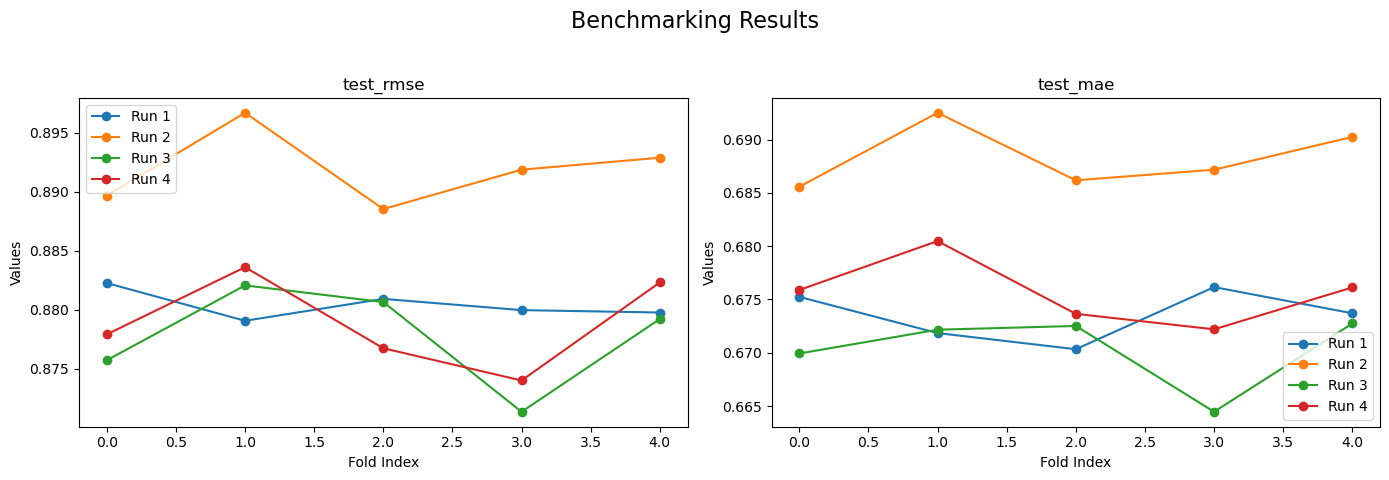

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'accuries_df' is correctly spelled as 'accuracies_df'
# If not, replace 'accuries_df' with the actual DataFrame name

# Setting up the plot

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))  # Adjust the grid size
fig.suptitle('Benchmarking Results', fontsize=16)

metrics = ['test_rmse', 'test_mae']
for ax, metric in zip(axes.flatten(), metrics):
    for idx, values in enumerate(accuries_df[metric]):
        ax.plot(values, marker='o', label=f'Run {idx + 1}')
    ax.set_title(metric)
    ax.set_xlabel('Fold Index')
    ax.set_ylabel('Values')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

"""
sim_options_list=[
    {'name':'cosine','user_based':True},
    {'name': 'cosine','user_based':False},
    {'name': 'pearson','user_based': True},
    {'name': 'pearson', 'user_based': False}
]
"""

Run 1 - Cosine User Based

Run 2 - Cosine Item Based

Run 3 - Pearson User Based

Run 4 - Pearson Item Based

## Memory Based CF on Particular Users

In [112]:
"""
rating_by_userid=rating_df.groupby('userId')['rating'].count().sort_values(ascending=False)#.plot(kind='bar')
N_userid=42
top_N_users=rating_by_userid.head(N_userid)
"""

"\nrating_by_userid=rating_df.groupby('userId')['rating'].count().sort_values(ascending=False)#.plot(kind='bar')\nN_userid=42\ntop_N_users=rating_by_userid.head(N_userid)\n"